# Ranging and Ransac

We'll use the following imports:

In [207]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn import linear_model

If you get an error from importing sklearn, then you will have to install it using:
conda install scikit-learn

For the exercise we will be using the data taken from a lidar by a robot in a hallway. The data is saved in `laser.csv` and we can import this in Python using numpy as such:

In [208]:
laser = np.genfromtxt('laser.csv', delimiter=',')

The file contains only a single rotation of the lidar. You can open the file in any text editor to get a look at the data. Each number in the file is the distance measured in meters. The lidar starts measuring at 135 degrees and ends at -135 degrees and it rotates the same amount between each measurement. 

## Exercise 3.1
Convert the data in the csv file to x and y coordinates in a Carthesian coordinate system and plot the result using matplotlib.

Hint: Use [scatter](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) instead of plt.plot in order to show every measurement as a point. 

541
0.5
[ 135.   134.5  134.   133.5  133.   132.5  132.   131.5  131.   130.5
  130.   129.5  129.   128.5  128.   127.5  127.   126.5  126.   125.5
  125.   124.5  124.   123.5  123.   122.5  122.   121.5  121.   120.5
  120.   119.5  119.   118.5  118.   117.5  117.   116.5  116.   115.5
  115.   114.5  114.   113.5  113.   112.5  112.   111.5  111.   110.5
  110.   109.5  109.   108.5  108.   107.5  107.   106.5  106.   105.5
  105.   104.5  104.   103.5  103.   102.5  102.   101.5  101.   100.5
  100.    99.5   99.    98.5   98.    97.5   97.    96.5   96.    95.5
   95.    94.5   94.    93.5   93.    92.5   92.    91.5   91.    90.5
   90.    89.5   89.    88.5   88.    87.5   87.    86.5   86.    85.5
   85.    84.5   84.    83.5   83.    82.5   82.    81.5   81.    80.5
   80.    79.5   79.    78.5   78.    77.5   77.    76.5   76.    75.5
   75.    74.5   74.    73.5   73.    72.5   72.    71.5   71.    70.5
   70.    69.5   69.    68.5   68.    67.5   67.    66.5   66.    65.

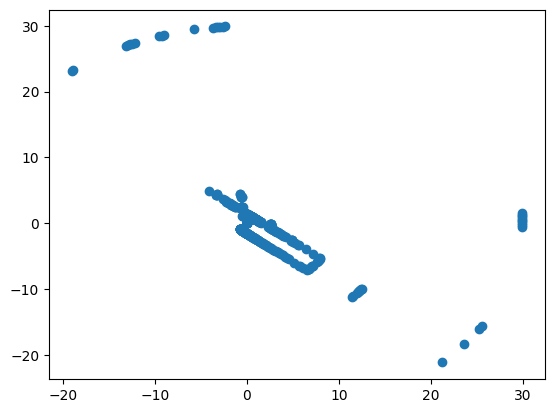

In [216]:
# Convert to x and y coordinates
# csv_file = np.genfromtxt('laser.csv', delimiter=',')
print(laser.shape[0])
laser_step = ((2.0*135.0)/(laser.shape[0]-1))
print(laser_step)
angles = np.arange(-135.0, 135.0 + laser_step, laser_step)
angles = np.flip(angles)

x = laser * np.cos(np.radians(angles))
y = laser * np.sin(np.radians(angles))

plt.scatter(x, y)
plt.show()

## Exercise 3.2

We would like to locate one of the walls in the dataset. To do so we will use [Ransac](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RANSACRegressor.html) to fine the best line fit in the noisy data. A Ransac regressor is initialized the following way using sklearn:

In [210]:
ransac = linear_model.RANSACRegressor()

Now that we have our Ransac regressor we can fit it to a dataset (x,y):

In [211]:
# Fit data
print(x.shape)
print(y.shape)
x = x.reshape(-1, 1)
y = y.reshape(-1, 1)
print(x.shape)
print(y.shape)
ransac.fit(x, y)

(541,)
(541,)
(541, 1)
(541, 1)


RANSACRegressor()

Finally, to get the fitted line we can use the predict function. As an argument this takes the x values in which the line will be predicted:

In [212]:
# Predict line
line_X = np.arange(x.min(), x.max())[:, np.newaxis]
line_y = ransac.predict(line_X)


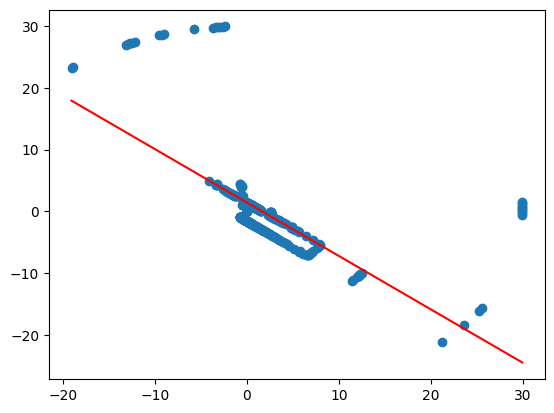

In [213]:
plt.plot(line_X, line_y, color="red", label="Linear regressor")
plt.scatter(x, y)
plt.show()



Plot the line on top of the scatterplot from before to see the fit.

## Exercise 3.3

To see which data points were used to make the line fit and which were deemed outliers, we can use the function ransac.inlier_mask_

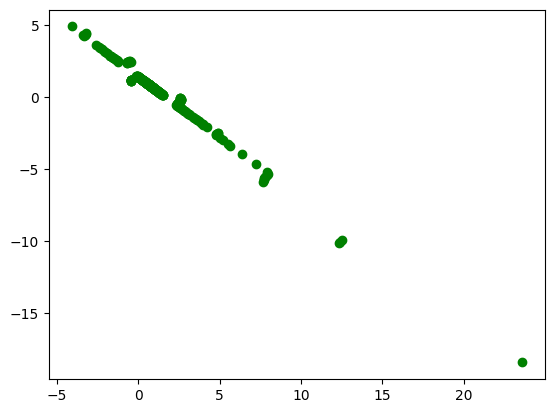

In [214]:
plt.scatter(x[ransac.inlier_mask_], y[ransac.inlier_mask_], color='green')

Find the second hallway wall using another Ransac fit and plot it together with the data points and the first ransac fit.

Hint: Use the outliers from the first Ransac.

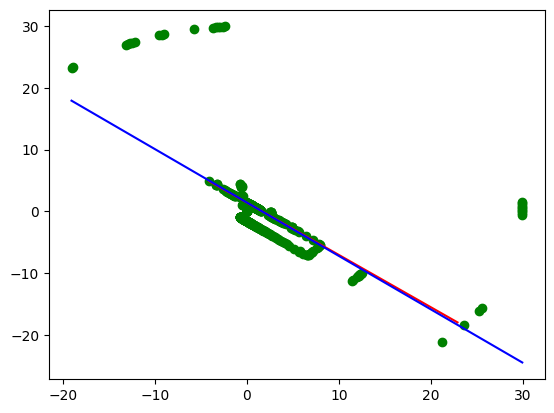

In [215]:
from sklearn.preprocessing import PolynomialFeatures
ransac2 = linear_model.RANSACRegressor()
# get the ones NOT in the inlier mask
x_new = x[~ransac.inlier_mask_].copy()
y_new = y[~ransac.inlier_mask_].copy()

x_new = x_new.reshape(-1, 1)
y_new = y_new.reshape(-1, 1)
ransac2.fit(x_new, y_new)

line_X_new = np.arange(x_new.min(), x_new.max())[:, np.newaxis]
line_y_new = ransac2.predict(line_X_new)

plt.plot(line_X_new, line_y_new, color="red", label="Linear regressor Outliers")
plt.plot(line_X, line_y, color="blue", label="Linear regressor")
plt.scatter(x, y, color="green")
plt.show()

# # Find the second hallway wall
# x_new = x[ransac.inlier_mask_].copy()
# y_new = y[ransac.inlier_mask_].copy()


# poly_features = PolynomialFeatures(degree=2, include_bias=False)
# X_poly = poly_features.fit_transform(x_new[:, np.newaxis])
# ransac2 = linear_model.RANSACRegressor()

# ransac2.fit(X_poly, y_new)
# # Predict polynomial
# X_new_poly = poly_features.transform(x_new[:, np.newaxis])
# y_new_pred = ransac2.predict(X_new_poly)

# plt.plot(X_new_poly, y_new_pred, color="red", label="Linear regressor")
# plt.plot(line_X, line_y, color="blue", label="Linear regressor")
# plt.scatter(x, y, color="green")
# plt.show()